<a href="https://colab.research.google.com/github/ali1234-56/JengYeh_WEB/blob/main/%E6%AD%A1%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>歡迎使用 Colab！</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;新功能&#41; 使用 Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


如果你已經熟悉 Colab，請觀看這部影片瞭解互動式表格、執行過的程式碼歷史記錄檢視畫面，以及指令區塊面板。

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  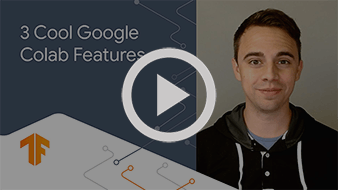
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab 是什麼？</h2>
</div>

Colab &#40;全名為「Colaboratory」&#41; 可讓你在瀏覽器中編寫及執行 Python 程式碼，並具有以下優點：
- 不必進行任何設定
- 免付費使用 GPU
- 輕鬆共用

無論你是<strong>學生</strong>、<strong>數據資料學家</strong>或是 <strong>AI 研究人員</strong>，Colab 都能讓你的工作事半功倍。請觀看 <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 的簡介影片</a>瞭解詳情，或是直接瀏覽以下的新手入門說明！

<div class="markdown-google-sans">

## <strong>開始使用</strong>
</div>

你正在閱讀的文件並非靜態網頁，而是名為 <strong>Colab 筆記本</strong>的互動式環境，可讓你撰寫和執行程式碼。

舉例來說，以下是包含簡短 Python 指令碼的<strong>程式碼儲存格</strong>，可進行運算、將值儲存至變數中並列印運算結果：

In [11]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import random


# 設定晶圓參數
wafer_diameter = 300  # 晶圓直徑 (mm)
die_size = 10  # 晶粒尺寸 (mm)
edge_exclusion = 5  # 邊緣排除區域 (mm)

# 創建晶粒位置網格
radius = wafer_diameter / 2
x_positions = np.arange(-radius + die_size/2, radius, die_size)
y_positions = np.arange(-radius + die_size/2, radius, die_size)

# 創建數據框
data = []
for x in x_positions:
    for y in y_positions:
        # 檢查晶粒中心是否在晶圓內 (考慮邊緣排除)
        if x**2 + y**2 <= (radius - edge_exclusion)**2:
            # 隨機生成測試結果 (0: 失敗, 1: 通過)
            test_result = random.choice([0, 1])
            data.append({
                'x': x,
                'y': y,
                'result': test_result
            })

df = pd.DataFrame(data)

# 計算良率
yield_rate = df['result'].mean() * 100

# 創建顏色映射
color_map = {0: 'red', 1: 'green'}

# 創建晶圓測試圖
fig = go.Figure()

# 使用方格表示每個晶粒
for _, row in df.iterrows():
    x = row['x']
    y = row['y']
    result = row['result']
    color = color_map[result]

    # 計算方格的四個角點
    half_size = die_size / 2
    x0, x1 = x - half_size, x + half_size
    y0, y1 = y - half_size, y + half_size

    # 添加方格
    fig.add_shape(
        type="rect",
        x0=x0, y0=y0, x1=x1, y1=y1,
        line=dict(color="black", width=1),
        fillcolor=color,
        opacity=0.8
    )

    # 添加懸停文本的透明點
    fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers',
        marker=dict(size=0.1, opacity=0),
        text=f"位置: ({x:.1f}, {y:.1f})<br>結果: {'通過' if result == 1 else '失敗'}",
        hoverinfo='text',
        showlegend=False
    ))

# 添加晶圓邊界
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)
fig.add_trace(go.Scatter(
    x=x_circle,
    y=y_circle,
    mode='lines',
    line=dict(color='blue', width=2),
    hoverinfo='skip',
    showlegend=False
))

# 添加圖例
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='markers',
    marker=dict(size=10, color='green'),
    name='通過'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='markers',
    marker=dict(size=10, color='red'),
    name='失敗'
))

# 設定圖表布局
fig.update_layout(
    title=f'晶圓測試圖 (良率: {yield_rate:.1f}%)',
    xaxis=dict(
        title='X 位置 (mm)',
        zeroline=True,
        range=[-radius-10, radius+10]
    ),
    yaxis=dict(
        title='Y 位置 (mm)',
        zeroline=True,
        range=[-radius-10, radius+10],
        scaleanchor='x',
        scaleratio=1
    ),
    width=800,
    height=800,
    plot_bgcolor='rgba(240, 240, 240, 0.8)'
)

# 顯示圖表
fig.show()

# 保存為 HTML 文件 (可選)
fig.write_html('wafer_test_map_grid.html')

In [13]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import random

def create_wafer_map(wafer_diameter=300, die_size=10, edge_exclusion=5, seed=None):
    """
    創建晶圓測試圖並返回 Plotly 圖形對象

    參數:
    wafer_diameter: 晶圓直徑 (mm)
    die_size: 晶粒尺寸 (mm)
    edge_exclusion: 邊緣排除區域 (mm)
    seed: 隨機數種子，用於重現結果

    返回:
    fig: Plotly 圖形對象
    """
    # 設置隨機種子（如果提供）
    if seed is not None:
        random.seed(seed)

    # 設定晶圓參數
    radius = wafer_diameter / 2
    x_positions = np.arange(-radius + die_size/2, radius, die_size)
    y_positions = np.arange(-radius + die_size/2, radius, die_size)

    # 創建數據框
    data = []
    for x in x_positions:
        for y in y_positions:
            # 檢查晶粒中心是否在晶圓內 (考慮邊緣排除)
            if x**2 + y**2 <= (radius - edge_exclusion)**2:
                # 隨機生成測試結果 (0: 失敗, 1: 通過)
                test_result = random.choice([0, 1])
                data.append({
                    'x': x,
                    'y': y,
                    'result': test_result
                })

    df = pd.DataFrame(data)

    # 計算良率
    yield_rate = df['result'].mean() * 100

    # 創建顏色映射
    color_map = {0: 'red', 1: 'green'}

    # 創建晶圓測試圖
    fig = go.Figure()

    # 使用方格表示每個晶粒
    for _, row in df.iterrows():
        x = row['x']
        y = row['y']
        result = row['result']
        color = color_map[result]

        # 計算方格的四個角點
        half_size = die_size / 2
        x0, x1 = x - half_size, x + half_size
        y0, y1 = y - half_size, y + half_size

        # 添加方格
        fig.add_shape(
            type="rect",
            x0=x0, y0=y0, x1=x1, y1=y1,
            line=dict(color="black", width=1),
            fillcolor=color,
            opacity=0.8
        )

        # 添加懸停文本的透明點
        fig.add_trace(go.Scatter(
            x=[x],
            y=[y],
            mode='markers',
            marker=dict(size=0.1, opacity=0),
            text=f"位置: ({x:.1f}, {y:.1f})<br>結果: {'通過' if result == 1 else '失敗'}",
            hoverinfo='text',
            showlegend=False
        ))

    # 添加晶圓邊界
    theta = np.linspace(0, 2*np.pi, 100)
    x_circle = radius * np.cos(theta)
    y_circle = radius * np.sin(theta)
    fig.add_trace(go.Scatter(
        x=x_circle,
        y=y_circle,
        mode='lines',
        line=dict(color='blue', width=2),
        hoverinfo='skip',
        showlegend=False
    ))

    # 添加圖例
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=10, color='green'),
        name='通過'
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=10, color='red'),
        name='失敗'
    ))

    # 設定圖表布局
    fig.update_layout(
        title=f'晶圓測試圖 (良率: {yield_rate:.1f}%)',
        xaxis=dict(
            title='X 位置 (mm)',
            zeroline=True,
            range=[-radius-10, radius+10]
        ),
        yaxis=dict(
            title='Y 位置 (mm)',
            zeroline=True,
            range=[-radius-10, radius+10],
            scaleanchor='x',
            scaleratio=1
        ),
        width=800,
        height=800,
        plot_bgcolor='rgba(240, 240, 240, 0.8)'
    )

    return fig

# 如果直接運行此文件，則顯示圖表
if __name__ == "__main__":
    fig = create_wafer_map()
    fig.show()

如要執行上方儲存格中的程式碼，請按一下進行選取，再按一下程式碼左側的播放鍵，或是使用鍵盤快速鍵「Command/Ctrl + Enter 鍵」。按一下儲存格即可開始編輯程式碼。

在一個儲存格中定義的變數之後可用於其他儲存格：

In [ ]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd

def create_wafer_map_with_real_data(die_size=1):
    """
    創建晶圓測試圖並返回 Plotly 圖形對象，使用實際的測試數據
    保留格子效果但優化性能

    參數:
    die_size: 晶粒尺寸 (默認為1)

    返回:
    fig: Plotly 圖形對象
    """
    # 通過(pass)晶粒的座標
    pass_x = [76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 136, 155, 146, 136, 155, 116, 135, 126, 116, 135, 96, 115, 106, 96, 115, 76, 95, 86, 76, 95, 56, 75, 66, 56, 75, 36, 55, 46, 36, 55, 16, 35, 26, 16, 35, 36, 55, 46, 36, 55, 56, 75, 66, 56, 75, 76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 116, 135, 126, 116, 135, 136, 155, 146, 136, 155, 156, 175, 166, 156, 175, 156, 175, 166, 156, 175, 136, 155, 146, 136, 155, 116, 135, 126, 116, 135, 96, 115, 106, 96, 115, 76, 95, 86, 76, 95, 56, 75, 66, 56, 75, 36, 55, 46, 36, 55, 16, 35, 26, 16, 35, 16, 35, 26, 16, 35, 36, 55, 46, 36, 55, 56, 75, 66, 56, 75, 76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 116, 135, 126, 116, 135, 136, 155, 146, 136, 155, 156, 175, 166, 156, 175, 156, 175, 166, 156, 175, 136, 155, 146, 136, 155, 116, 135, 126, 116, 135, 96, 115, 106, 96, 115, 76, 95, 86, 76, 95, 56, 75, 66, 56, 75, 36, 55, 46, 36, 55, 16, 35, 26, 16, 35, 36, 55, 46, 36, 55, 56, 75, 66, 56, 75, 76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 116, 135, 126, 116, 135, 136, 155, 146, 136, 155, 96, 115, 106, 96, 115, 76, 95, 86]

    pass_y = [6, 6, 15, 24, 24, 6, 6, 15, 24, 24, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 139, 139, 148, 157, 157, 139, 139, 148]

    # 創建通過晶粒的集合，用於快速查找
    pass_coords = set(zip(pass_x, pass_y))

    # 確定數據範圍
    x_min, x_max = min(pass_x) - 20, max(pass_x) + 20
    y_min, y_max = min(pass_y) - 20, max(pass_y) + 20

    # 估計晶圓中心和半徑
    center_x = (min(pass_x) + max(pass_x)) / 2
    center_y = (min(pass_y) + max(pass_y)) / 2
    radius = max(max(pass_x) - center_x, max(pass_y) - center_y) + 20

    # 創建網格數據 (按die_size對齊)
    x_range = np.arange(x_min, x_max + die_size, die_size)
    y_range = np.arange(y_min, y_max + die_size, die_size)

    # 創建圖形
    fig = go.Figure()

    # 添加晶圓邊界
    theta = np.linspace(0, 2*np.pi, 100)
    x_circle = center_x + radius * np.cos(theta)
    y_circle = center_y + radius * np.sin(theta)
    fig.add_trace(go.Scatter(
        x=x_circle,
        y=y_circle,
        mode='lines',
        line=dict(color='blue', width=2),
        hoverinfo='skip',
        showlegend=False
    ))

    # 批量創建方格 - 分別處理通過和失敗的晶粒
    pass_rects = []
    fail_rects = []

    total_dies = 0
    pass_count = 0

    # 創建所有方格的座標
    for x in x_range:
        for y in y_range:
            # 檢查是否在晶圓內
            if (x - center_x)**2 + (y - center_y)**2 <= radius**2:
                half_size = die_size / 2
                x0, x1 = x - half_size, x + half_size
                y0, y1 = y - half_size, y + half_size

                # 檢查是否是通過晶粒
                if (x, y) in pass_coords:
                    pass_rects.append(dict(
                        type="rect",
                        x0=x0, y0=y0, x1=x1, y1=y1,
                        line=dict(width=0.5),
                        fillcolor="green",
                        opacity=0.8
                    ))
                    pass_count += 1
                else:
                    fail_rects.append(dict(
                        type="rect",
                        x0=x0, y0=y0, x1=x1, y1=y1,
                        line=dict(width=0.5),
                        fillcolor="red",
                        opacity=0.8
                    ))
                total_dies += 1

    # 計算良率
    yield_rate = (pass_count / total_dies * 100) if total_dies > 0 else 0

    # 批量添加方格
    for rect in pass_rects:
        fig.add_shape(rect)

    for rect in fail_rects:
        fig.add_shape(rect)

    # 添加懸停效果的點 (使用稀疏網格以提高性能)
    hover_x = []
    hover_y = []
    hover_text = []

    # 只為部分晶粒添加懸停效果，以提高性能
    step = max(1, int(len(x_range) * len(y_range) / 2000))  # 限制懸停點數量

    for i, x in enumerate(x_range):
        if i % step != 0:
            continue
        for j, y in enumerate(y_range):
            if j % step != 0:
                continue
            # 檢查是否在晶圓內
            if (x - center_x)**2 + (y - center_y)**2 <= radius**2:
                hover_x.append(x)
                hover_y.append(y)
                result = 1 if (x, y) in pass_coords else 0
                hover_text.append(f"位置: ({x}, {y})<br>結果: {'通過' if result == 1 else '失敗'}")

    fig.add_trace(go.Scatter(
        x=hover_x,
        y=hover_y,
        mode='markers',
        marker=dict(size=1, opacity=0),
        text=hover_text,
        hoverinfo='text',
        showlegend=False
    ))

    # 添加圖例
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=10, color='green'),
        name='通過'
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=10, color='red'),
        name='失敗'
    ))

    # 設定圖表布局
    fig.update_layout(
        title=f'晶圓測試圖 (良率: {yield_rate:.1f}%)',
        xaxis=dict(
            title='X 位置',
            zeroline=True,
            range=[x_min - 10, x_max + 10]
        ),
        yaxis=dict(
            title='Y 位置',
            zeroline=True,
            range=[y_min - 10, y_max + 10],
            scaleanchor='x',
            scaleratio=1
        ),
        width=800,
        height=800,
        plot_bgcolor='rgba(240, 240, 240, 0.8)'
    )

    return fig

# 如果直接運行此文件，則顯示圖表
if __name__ == "__main__":
    fig = create_wafer_map_with_real_data(die_size=1)
    fig.show()

Colab 筆記本可讓你在單一文件中結合<strong>可執行的程式碼</strong>和 <strong>RTF 格式</strong>，並附帶<strong>圖片</strong>、<strong>HTML</strong>、<strong>LaTeX</strong> 等其他格式的內容。你建立的 Colab 筆記本會儲存到你的 Google 雲端硬碟帳戶中。你可以輕鬆將 Colab 筆記本與同事或朋友共用，讓他們在筆記本上加上註解，或甚至進行編輯。詳情請參閱 <a href="/notebooks/basic_features_overview.ipynb">Colab 總覽</a>。如要建立新的 Colab 筆記本，你可以使用上方的「檔案」選單或以下連結：<a href="http://colab.research.google.com#create=true">建立新的 Colab 筆記本</a>。

Colab 筆記本是由 Colab 代管的 Jupyter 筆記本。如要進一步瞭解 Jupyter 專案，請參閱 <a href="https://www.jupyter.org">jupyter.org</a>。

<div class="markdown-google-sans">

## 數據資料學
</div>

Colab 可讓你充分利用熱門 Python 程式庫的強大功能，對資料進行分析並以視覺化方式呈現。下方的程式碼儲存格使用 <strong>numpy</strong> 來產生一些隨機性資料，並透過 <strong>matplotlib</strong> 將這些資料視覺化。按一下儲存格即可開始編輯程式碼。

In [18]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd

def create_wafer_map_with_real_data(die_size=1):
    """
    創建晶圓測試圖並返回 Plotly 圖形對象，使用實際的測試數據

    參數:
    die_size: 晶粒尺寸 (默認為1)

    返回:
    fig: Plotly 圖形對象
    """
    # 通過(pass)晶粒的座標
    pass_x = [76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 136, 155, 146, 136, 155, 116, 135, 126, 116, 135, 96, 115, 106, 96, 115, 76, 95, 86, 76, 95, 56, 75, 66, 56, 75, 36, 55, 46, 36, 55, 16, 35, 26, 16, 35, 36, 55, 46, 36, 55, 56, 75, 66, 56, 75, 76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 116, 135, 126, 116, 135, 136, 155, 146, 136, 155, 156, 175, 166, 156, 175, 156, 175, 166, 156, 175, 136, 155, 146, 136, 155, 116, 135, 126, 116, 135, 96, 115, 106, 96, 115, 76, 95, 86, 76, 95, 56, 75, 66, 56, 75, 36, 55, 46, 36, 55, 16, 35, 26, 16, 35, 16, 35, 26, 16, 35, 36, 55, 46, 36, 55, 56, 75, 66, 56, 75, 76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 116, 135, 126, 116, 135, 136, 155, 146, 136, 155, 156, 175, 166, 156, 175, 156, 175, 166, 156, 175, 136, 155, 146, 136, 155, 116, 135, 126, 116, 135, 96, 115, 106, 96, 115, 76, 95, 86, 76, 95, 56, 75, 66, 56, 75, 36, 55, 46, 36, 55, 16, 35, 26, 16, 35, 36, 55, 46, 36, 55, 56, 75, 66, 56, 75, 76, 95, 86, 76, 95, 96, 115, 106, 96, 115, 116, 135, 126, 116, 135, 136, 155, 146, 136, 155, 96, 115, 106, 96, 115, 76, 95, 86]

    pass_y = [6, 6, 15, 24, 24, 6, 6, 15, 24, 24, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 25, 25, 34, 43, 43, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 44, 44, 53, 62, 62, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 63, 63, 72, 81, 81, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 82, 82, 91, 100, 100, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 101, 101, 110, 119, 119, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 120, 120, 129, 138, 138, 139, 139, 148, 157, 157, 139, 139, 148]

    # 創建通過晶粒的集合，用於快速查找
    pass_coords = set(zip(pass_x, pass_y))

    # 確定數據範圍
    x_min, x_max = min(pass_x) - 20, max(pass_x) + 20
    y_min, y_max = min(pass_y) - 20, max(pass_y) + 20

    # 估計晶圓中心和半徑
    center_x = (min(pass_x) + max(pass_x)) / 2
    center_y = (min(pass_y) + max(pass_y)) / 2
    radius = max(max(pass_x) - center_x, max(pass_y) - center_y) + 20

    # 創建網格數據
    x_range = np.arange(x_min, x_max + die_size, die_size)
    y_range = np.arange(y_min, y_max + die_size, die_size)

    # 創建結果矩陣
    z_data = np.zeros((len(y_range), len(x_range)))

    # 填充結果矩陣
    total_dies = 0
    pass_count = 0

    for i, y in enumerate(y_range):
        for j, x in enumerate(x_range):
            # 檢查是否在晶圓內
            if (x - center_x)**2 + (y - center_y)**2 <= radius**2:
                # 檢查是否是通過晶粒
                if (x, y) in pass_coords:
                    z_data[i, j] = 1
                    pass_count += 1
                total_dies += 1
            else:
                z_data[i, j] = np.nan  # 不在晶圓內的設為 NaN

    # 計算良率
    yield_rate = (pass_count / total_dies * 100) if total_dies > 0 else 0

    # 創建熱圖
    fig = go.Figure(data=go.Heatmap(
        z=z_data,
        x=x_range,
        y=y_range,
        colorscale=[[0, 'red'], [1, 'green']],
        showscale=False,
        hovertemplate='X: %{x}<br>Y: %{y}<br>結果: %{z}<extra></extra>'
    ))

    # 添加晶圓邊界
    theta = np.linspace(0, 2*np.pi, 100)
    x_circle = center_x + radius * np.cos(theta)
    y_circle = center_y + radius * np.sin(theta)
    fig.add_trace(go.Scatter(
        x=x_circle,
        y=y_circle,
        mode='lines',
        line=dict(color='blue', width=2),
        hoverinfo='skip',
        showlegend=False
    ))

    # 添加圖例
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=10, color='green'),
        name='通過'
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=10, color='red'),
        name='失敗'
    ))

    # 設定圖表布局
    fig.update_layout(
        title=f'晶圓測試圖 (良率: {yield_rate:.1f}%)',
        xaxis=dict(
            title='X 位置',
            zeroline=True,
            range=[x_min - 10, x_max + 10]
        ),
        yaxis=dict(
            title='Y 位置',
            zeroline=True,
            range=[y_min - 10, y_max + 10],
            scaleanchor='x',
            scaleratio=1
        ),
        width=800,
        height=800,
        plot_bgcolor='rgba(240, 240, 240, 0.8)'
    )

    return fig

# 如果直接運行此文件，則顯示圖表
if __name__ == "__main__":
    fig = create_wafer_map_with_real_data(die_size=1)
    fig.show()

你可從自己的 Google 雲端硬碟帳戶 &#40;包括試算表&#41;、GitHub 和許多其他來源，將資料匯入 Colab 筆記本中。如要進一步瞭解如何匯入資料以及將 Colab 用於數據資料學，請參閱下方「<a href="#working-with-data">處理資料</a>」底下的連結。

<div class="markdown-google-sans">

## 機器學習
</div>

你只需要寫<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">幾行程式碼</a>，即可透過 Colab 匯入圖片資料集、根據圖片資料集訓練圖片分類工具並評估模型。Colab 筆記本可在 Google 的雲端伺服器上執行程式碼，也就是說，您可以充分運用 Google 硬體的強大效能 &#40;包括 <a href="#using-accelerated-hardware">GPU 和 TPU</a>&#41;，而不必在意自己的電腦性能如何，因為你只要使用瀏覽器就可以了。

Colab 廣泛運用於機器學習社群，相關應用包括：
- 開始使用 TensorFlow
- 開發及訓練類神經網路
- 使用 TPU 進行實驗
- 推廣 AI 研究
- 建立教學課程

如要查看示範機器學習應用程式的範例 Colab 筆記本，請參閱下方的<a href="#machine-learning-examples">機器學習範例</a>。

<div class="markdown-google-sans">

## 其他資源

### 在 Colab 中使用筆記本

</div>

- [Colaboratory 總覽](/notebooks/basic_features_overview.ipynb)
- [Markdown 指南](/notebooks/markdown_guide.ipynb)
- [匯入程式庫及安裝依附元件](/notebooks/snippets/importing_libraries.ipynb)
- [儲存和載入 GitHub 中的筆記本](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [互動式表單](/notebooks/forms.ipynb)
- [互動式小工具](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 處理資料
</div>

- [載入資料：雲端硬碟、試算表及 Google Cloud Storage](/notebooks/io.ipynb)
- [圖表：將資料視覺化](/notebooks/charts.ipynb)
- [開始使用 BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 機器學習密集課程

<div>

以下是一些 Google 線上機器學習課程的筆記本。詳情請參閱<a href="https://developers.google.com/machine-learning/crash-course/">完整的課程網站</a>。
- [Pandas DataFrame 簡介](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [以 tf.keras 使用合成資料進行線性迴歸](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 使用加速硬體
</div>

- [搭配 GPU 使用 TensorFlow](/notebooks/gpu.ipynb)
- [使用 TPU 的 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 主要範例

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>：使用 Nvidia 的 NeMo 對話式 AI 工具組將音訊片段中的語音換成電腦產生的語音。

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">重新訓練圖片分類工具</a>：以預先訓練的圖片分類工具為基礎，建立一個分辨花朵的 Keras 模型。
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">文字分類</a>：將 IMDB 電影評論分類為<em>正面</em>或<em>負面</em>。
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">風格轉換</a>：運用深度學習轉換圖片的風格。
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">支援多種語言的 Universal Sentence Encoder 問與答</a>：使用機器學習模型來回答 SQuAD 資料集的問題。
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">影片畫面內插</a>：預測影片在第一個與最後一個畫面之間的內容。
